In [63]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement ML Algorithms
import sklearn
from sklearn.tree import DecisionTreeClassifier # DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier # AdaBoostClassifier
from sklearn.ensemble import VotingClassifier # VotingClassifier
from sklearn.inspection import permutation_importance

from sklearn.metrics import f1_score

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to record time
import time

# Module to save and load Python objects to and from files
import pickle 

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

%matplotlib inline

In [64]:
df = pd.read_csv('fetal_health.csv')
df['fetal_health'] = df['fetal_health'].replace({
    1.0: "Normal",
    2.0: "Suspect",
    3.0: "Pathological"
})
df.head()

# used chatGPT to change the fetal_health column from numerical to categorical

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,Suspect
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,Normal
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,Normal
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,Normal
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,Normal


In [65]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [66]:
# Select input and output features
X = df.drop(columns = ['fetal_health'])
y = df['fetal_health']

In [67]:
# One hot encoding for categorical variables
X_encoded = pd.get_dummies(X)
X_encoded.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [68]:
# Data partitioning into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42)

In [69]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state = 42)

start = time.time()            # Start Time
dt_clf.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Training time: 0.02083110809326172s


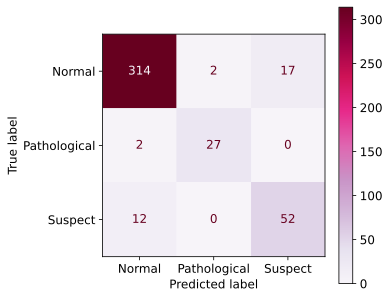

In [70]:
# Decision Tree Confusion Matrix
# Predictions on test set
y_pred = dt_clf.predict(test_X)

# Now generate confusion matrix
dt_cm = confusion_matrix(test_y, y_pred, labels = dt_clf.classes_)
dt_disp = ConfusionMatrixDisplay(confusion_matrix = dt_cm, display_labels = dt_clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
dt_disp.plot(cmap = 'PuRd', ax = ax)

# Save as SVG
plt.savefig("dt_confusion_matrix.svg", bbox_inches = 'tight');

In [71]:
# Decision Tree Classification Report
dt_report = classification_report(test_y, y_pred, output_dict = True)
dt_report_df = pd.DataFrame(dt_report)
dt_report_df

# Save the report as a CSV File
dt_report_df.to_csv('dt_class_report.csv') 

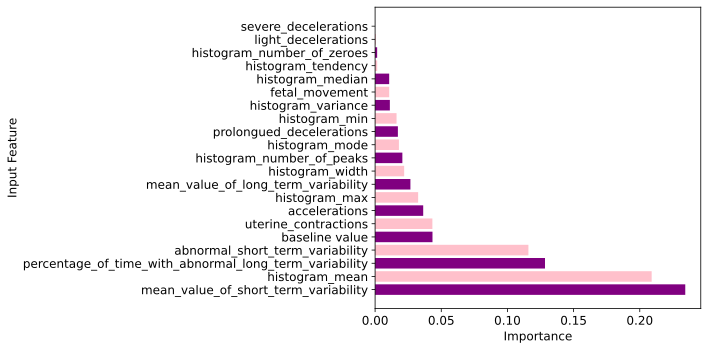

In [72]:
# Decision Tree Feature Importance Plot
# Storing importance values from the trained model
dt_importance = dt_clf.feature_importances_

# Storing feature importance as a dataframe
dt_feature_imp = pd.DataFrame(list(zip(train_X.columns, dt_importance)),
               columns = ['Feature', 'Importance'])

dt_feature_imp = dt_feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize = (10, 5))
plt.barh(dt_feature_imp['Feature'], dt_feature_imp['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.tight_layout()
plt.savefig("dt_feature_imp.svg");

In [73]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
dt_pickle = open('dt_fetal.pickle', 'wb') 

# Write DT model to the file
pickle.dump(dt_clf, dt_pickle) 

# Close the file
dt_pickle.close() 

In [74]:
# Random Forest
rf_clf = RandomForestClassifier(random_state = 42)

start = time.time()            # Start Time
rf_clf.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Training time: 0.2510871887207031s


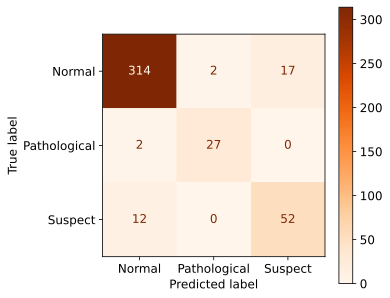

In [75]:
# Random Forest Confusion Matrix
# Predictions on test set
y_pred = rf_clf.predict(test_X)

# Now generate confusion matrix
rf_cm = confusion_matrix(test_y, y_pred, labels = rf_clf.classes_)
rf_disp = ConfusionMatrixDisplay(confusion_matrix = rf_cm, display_labels = rf_clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'Oranges', ax = ax)

# Save as SVG
plt.savefig("rf_confusion_matrix.svg", bbox_inches = 'tight');

In [76]:
# Random Forest Classification Report
rf_report = classification_report(test_y, y_pred, output_dict = True)
rf_report_df = pd.DataFrame(rf_report)
rf_report_df

# Save the report as a CSV File
rf_report_df.to_csv('rf_class_report.csv') 

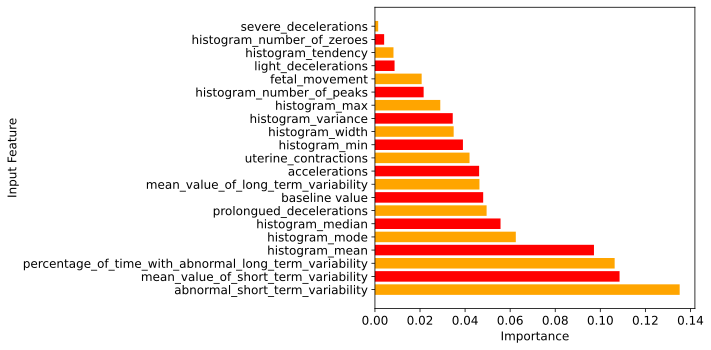

In [77]:
# Random Forest Feature Importance Plot
# Storing importance values from the trained model
rf_importance = rf_clf.feature_importances_

# Storing feature importance as a dataframe
rf_feature_imp = pd.DataFrame(list(zip(train_X.columns, rf_importance)),
               columns = ['Feature', 'Importance'])

rf_feature_imp = rf_feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize = (10, 5))
plt.barh(rf_feature_imp['Feature'], rf_feature_imp['Importance'], color = ['orange', 'red'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.tight_layout()
plt.savefig("rf_feature_imp.svg");

In [78]:
# Pickle file: saving the trained RF model
# Creating the file where we want to write the model
rf_pickle = open('rf_fetal.pickle', 'wb') 

# Write DT model to the file
pickle.dump(rf_clf, rf_pickle) 

# Close the file
rf_pickle.close() 

In [79]:
# AdaBoost Classifier
# Decision Tree Classifier
ada_clf = AdaBoostClassifier(random_state = 42)

start = time.time()            # Start Time
ada_clf.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Training time: 0.15012645721435547s


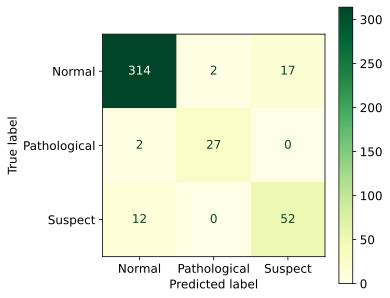

In [80]:
# AdaBoost Confusion Matrix
# Predictions on test set
y_pred = ada_clf.predict(test_X)

# Now generate confusion matrix
ada_cm = confusion_matrix(test_y, y_pred, labels = ada_clf.classes_)
ada_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ada_clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'YlGn', ax = ax)

# Save as SVG
plt.savefig("ada_confusion_matrix.svg", bbox_inches = 'tight');

In [81]:
# Ada Boost Classification Report
ada_report = classification_report(test_y, y_pred, output_dict = True)
ada_report_df = pd.DataFrame(ada_report)
ada_report_df

# Save the report as a CSV File
ada_report_df.to_csv('ada_class_report.csv') 

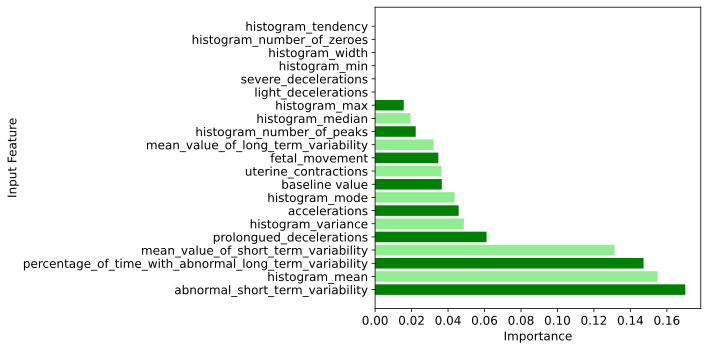

In [82]:
# Adaboost Feature Importance Plot
# Storing importance values from the trained model
ada_importance = ada_clf.feature_importances_

# Storing feature importance as a dataframe
ada_feature_imp = pd.DataFrame(list(zip(train_X.columns, ada_importance)),
               columns = ['Feature', 'Importance'])

ada_feature_imp = ada_feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize = (10, 5))
plt.barh(ada_feature_imp['Feature'], ada_feature_imp['Importance'], color = ['green', 'lightgreen'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.tight_layout()
plt.savefig("ada_feature_imp.svg");

In [83]:
# Pickle file: saving the trained Ada model
# Creating the file where we want to write the model
ada_pickle = open('ada_fetal.pickle', 'wb') 

# Write DT model to the file
pickle.dump(ada_clf, ada_pickle) 

# Close the file
ada_pickle.close() 

In [84]:
f1_scores = [
    f1_score(test_y, clf.fit(train_X, train_y).predict(test_X), average='macro')
    for clf in (dt_clf, rf_clf, ada_clf)
]

In [85]:
# Soft Voting Classifier
soft_voting_clf = VotingClassifier(estimators = [('dt', dt_clf), ('rf', rf_clf), ('ada', ada_clf)],
                              voting = 'soft', n_jobs = -1, weights = f1_scores)
soft_voting_clf.fit(train_X, train_y)

,estimators,"[('dt', ...), ('rf', ...), ...]"
,voting,'soft'
,weights,"[0.8876883376472899, 0.9030366861827966, ...]"
,n_jobs,-1
,flatten_transform,True
,verbose,False
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


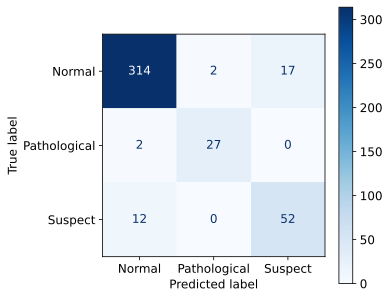

In [86]:
# Soft Voting Confusion Matrix
# Predictions on test set
y_pred = soft_voting_clf.predict(test_X)

# Now generate confusion matrix
sv_cm = confusion_matrix(test_y, y_pred, labels = soft_voting_clf.classes_)
sv_disp = ConfusionMatrixDisplay(confusion_matrix = sv_cm, display_labels = soft_voting_clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
sv_disp.plot(cmap = 'Blues', ax = ax)

# Save as SVG
plt.savefig("sv_confusion_matrix.svg", bbox_inches = 'tight');

In [87]:
# Soft Voting Classification Report
sv_report = classification_report(test_y, y_pred, output_dict = True)
sv_report_df = pd.DataFrame(sv_report)
sv_report_df

# Save the report as a CSV File
sv_report_df.to_csv('sv_class_report.csv') 

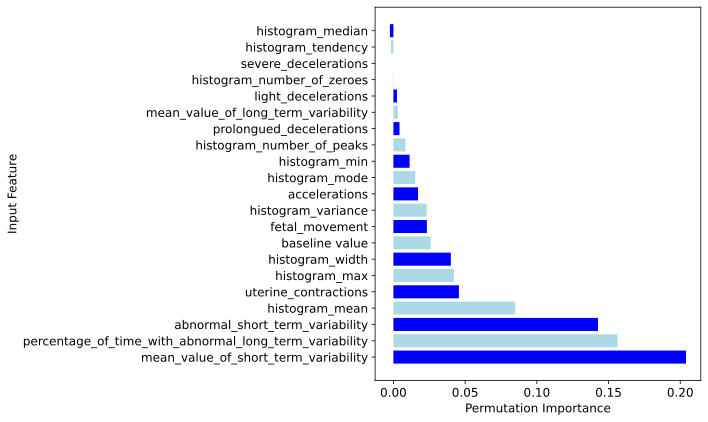

<Figure size 640x480 with 0 Axes>

In [88]:
result = permutation_importance(
    soft_voting_clf, test_X, test_y,
    scoring="f1_macro", n_repeats=10, random_state=42, n_jobs=-1
)

perm_imp = pd.DataFrame({
    "Feature": test_X.columns,
    "Importance": result.importances_mean,
    "Std": result.importances_std
}).sort_values("Importance", ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.barh(perm_imp["Feature"], perm_imp["Importance"], color = ['blue', 'lightblue'])
plt.xlabel("Permutation Importance")
plt.ylabel("Input Feature")
plt.tight_layout()
plt.show()
plt.savefig("sv_feature_imp.svg")

# used chatGPT to generate feature/permutation importance plot

In [89]:
# Pickle file: saving the trained Soft Voting model
# Creating the file where we want to write the model
sv_pickle = open('sv_fetal.pickle', 'wb') 

# Write DT model to the file
pickle.dump(soft_voting_clf, sv_pickle) 

# Close the file
sv_pickle.close() 